<a href="https://colab.research.google.com/github/C-HARRIETH/FIFA-RANKING/blob/main/Moringa_DS_Core_W6_Independent_Project_2021_04_Python_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 6 IP.** 

## 1. Defining the Question

### a) Specifying the Question


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### b) Defining the Metric for Success

Model 1: Predict how many goals the home team scores accurately, 88% accurate.

Model 2: Predict how many goals the away team scores with an 86 % accuracy level.

Model 3: Predict status from a home teams perspective.

### c) Understanding the context 

The data was gotten from [here](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc).

It shows football matches from several years and the rank of various teams in the world. 

## 2. Reading the Data

In [439]:
# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [440]:
# Loading the result Dataset
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
result= pd.read_csv('results.csv', parse_dates=['date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [441]:
# Loading the fifa ranking dataset
fifa= pd.read_csv('fifa_ranking.csv', parse_dates=['rank_date'], date_parser=d_parser)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## 3. Checking the Data

In [442]:
# No. of records in dataset
#
result.shape

(40839, 9)

In [443]:
fifa.shape

(57793, 16)

In [444]:
# Previewing the top of our dataset
#
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [445]:
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [446]:
# Checking whether each column has an appropriate datatype
#

result.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [447]:
fifa.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

## 4. External Data Source Validation

Data regarding football is recorded and stored well since, it can be all found in an external source [here](https://www.fifa.com/fifa-world-ranking/ranking-table/men/). The data source can therefore be trusted.

## 5. Tidying the Dataset

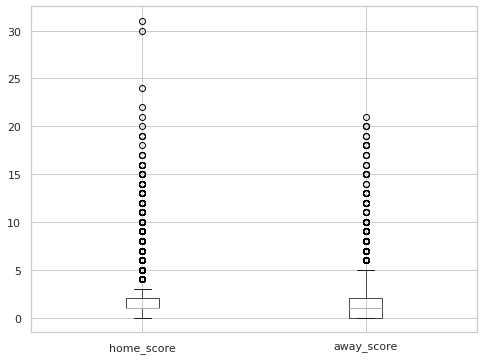

In [557]:
# Outlier detection 

col = ['home_score','away_score']

plt.subplots(figsize=(8, 6))
result.boxplot(col)

plt.title('Outlier Detection_Home and Away Team scores')
plt.show()

The dataset shows that there are extreme data points in the scores especially between Q3 and the maximum value

Dataset above has many extreme data points between the max value and Q3

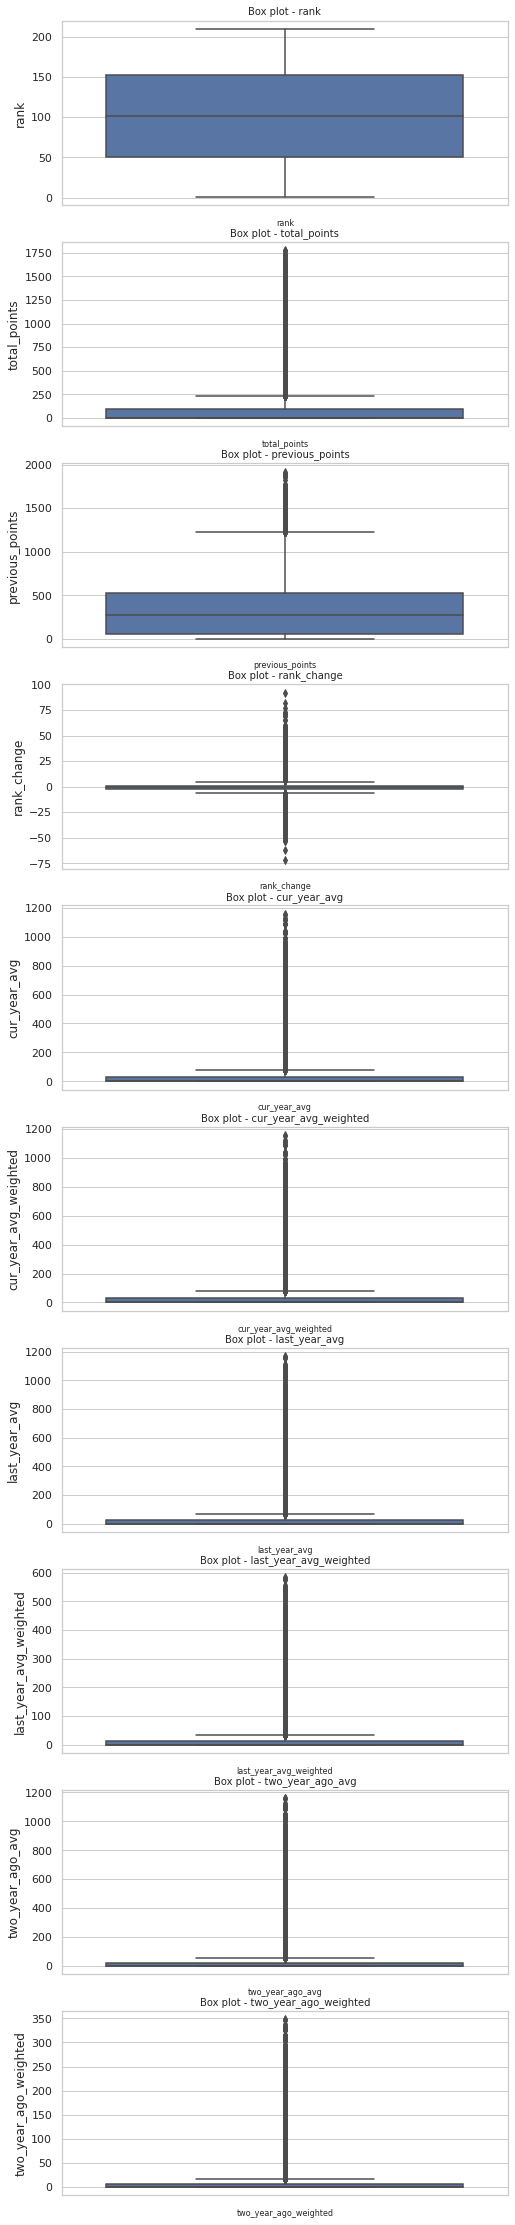

In [450]:

col_names = ['rank','total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [451]:
# Checking for Anomalies
# duplicate values
#
result.duplicated().values.any()

False

In [452]:
# Total number of duplicates
fifa.duplicated().sum().sum()

37

In [453]:
fifa.drop_duplicates(inplace= True)

In [454]:
fifa.duplicated().sum().sum()

0

Duplicates very few hence dropping

In [455]:
# Identifying the Missing Data
#

result.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [456]:
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [461]:
# Irrelevant columns
fifa.drop(['country_abrv', 'cur_year_avg', 'cur_year_avg_weighted', 
           'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 
           'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted', 
           'total_points', 'previous_points'],inplace= True, axis=1)

In [462]:
fifa.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,0.0,57,0,UEFA,1993-08-08
1,2,Italy,0.0,57,0,UEFA,1993-08-08
2,3,Switzerland,0.0,50,9,UEFA,1993-08-08
3,4,Sweden,0.0,55,0,UEFA,1993-08-08
4,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08


In [463]:
result.drop(['city'], inplace=True, axis=1)

In [464]:
result.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [465]:
# Extracting year and months from the date column
fifa['year'] = fifa.rank_date.dt.year

fifa['month'] = fifa.rank_date.dt.month

In [466]:
result['year'] = result.date.dt.year

result['month'] = result.date.dt.month

In [467]:
fifa['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [468]:
result['year'].unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

The fifa ranking dataset has a lower range of years. Making the datasets equal would mean standardizing the data by using the same years in the result dataset.

In [469]:
# Filtering the data having similar entries in the year column
# to that in the fifa dataset

less= result['year'] > 1992
nott= result['year'] != 2019

results= result[less & nott]

In [470]:
results.shape

(22990, 10)

In [471]:
# Merging to get Home dataset

home_rank = pd.merge(fifa, results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','home_team'])

In [472]:
home_rank.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,4,Sweden,0.0,55,0,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,0.0,55,0,UEFA,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,0.0,55,-5,CONMEBOL,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False


In [473]:
# Drop irrelevant columns

home_rank.drop(['rank_date', 'date', 'country'], axis=1, inplace= True)

In [474]:
# Renaming column
home_rank.rank = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [475]:
home_rank.head()

,home_rank,country_full,total_points,previous_points,rank_change,confederation,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,4,Sweden,0.0,55,0,UEFA,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,4,Sweden,0.0,55,0,UEFA,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,CONMEBOL,1993,8,Brazil,Mexico,1,1,Friendly,False


In [476]:
# Away Team dataset merging

away_rank = pd.merge(fifa, results, how = 'inner', left_on = ['year', 'month','country_full'], 
                     right_on = ['year', 'month','away_team'])

In [477]:
away_rank.head()

,rank,country_full,total_points,previous_points,rank_change,confederation,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,3,Switzerland,0.0,50,9,UEFA,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,0.0,51,5,CONMEBOL,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,0.0,55,-5,CONMEBOL,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [479]:
# renaming necessary columns
away_rank.rank = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)

In [480]:
# retaining only necessary columns
away_rank = away_rank[['away_rank','away_team','month','year']]
away_rank.head()

,away_rank,away_team,month,year
0,3,Switzerland,8,1993
1,5,Argentina,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,8,Brazil,8,1993


In [481]:
# Creating merged dataframe

merged = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], 
                     right_on = ['year', 'month','away_team'])

In [482]:
merged.head()

,home_rank,country_full,total_points,previous_points,rank_change,confederation,year,month,home_team,away_team,home_score,away_score,tournament,neutral,away_rank
0,4,Sweden,0.0,55,0,UEFA,1993,8,Sweden,Switzerland,1,2,Friendly,False,3
1,4,Sweden,0.0,55,0,UEFA,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False,12
2,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70
3,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70
4,5,Argentina,0.0,51,5,CONMEBOL,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False,70


In [483]:
# rearranging dataset

merged = merged[['home_team','home_score','away_team','away_score',
                       'year','home_rank','away_rank','tournament',
                       'month','year','total_points','previous_points']]


merged.head()

,home_team,home_score,away_team,away_score,year,home_rank,away_rank,tournament,month,year,total_points,previous_points
0,Sweden,1,Switzerland,2,1993,4,3,Friendly,8,1993,0.0,55
1,Sweden,1,France,1,1993,4,12,FIFA World Cup qualification,8,1993,0.0,55
2,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51
3,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51
4,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51


In [484]:
# Further data cleaning procedures
merged.isnull().values.any()

False

In [485]:
merged.duplicated().values.any()

True

In [486]:
merged.duplicated().sum().sum()

11572

In [487]:
merged.shape

(28439, 12)

In [489]:
# Feature Engineering

# create a list of our conditions
conditions = [
    (merged['home_score'] > merged['away_score']),
    (merged['home_score'] < merged['away_score']),
    (merged['home_score'] == merged['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = ['Win', 'Lose', 'Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
merged['status'] = np.select(conditions, values)

# display updated DataFrame
merged.head()

,home_team,home_score,away_team,away_score,year,home_rank,away_rank,tournament,month,year,total_points,previous_points,status
0,Sweden,1,Switzerland,2,1993,4,3,Friendly,8,1993,0.0,55,Lose
1,Sweden,1,France,1,1993,4,12,FIFA World Cup qualification,8,1993,0.0,55,Draw
2,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51,Win
3,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51,Win
4,Argentina,2,Peru,1,1993,5,70,FIFA World Cup qualification,8,1993,0.0,51,Win


In [490]:
# Tournament type based on whether or not the game is friendly

def tourna(kind):
    if kind == 'Friendly':
        return 'Friendly'
    else:
        return 'Not Friendly'
      
merged['tourna'] = merged.tournament.apply(lambda t: tourna(t))

------

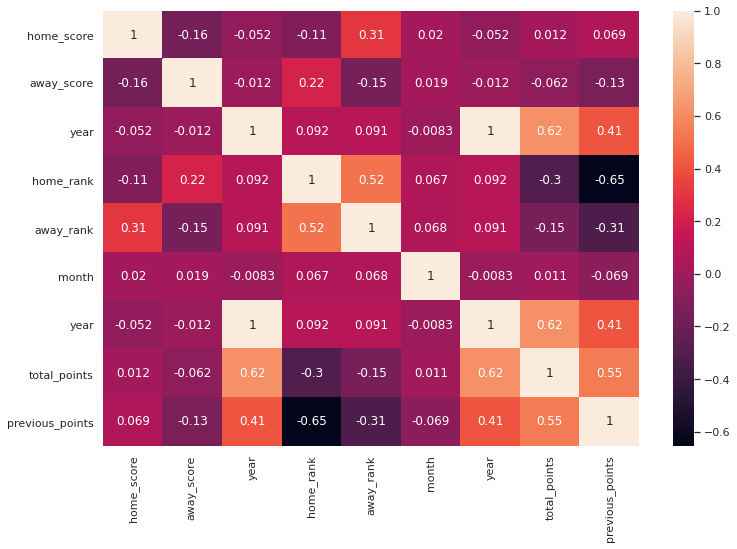

In [559]:
# Multi Collinearity
# correlation

correlations = merged.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

# Generating VIF score
# pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, 
 #             columns=correlations.columns)


-------

## 6. Exploratory Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


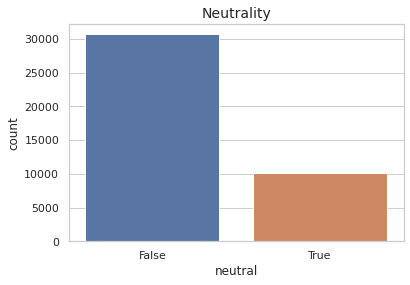

In [495]:
# Ploting the univariate summaries and recording our observations
#
# Neutrality
sns.set(style="whitegrid")
sns.countplot(merged.neutral)
plt.title("Neutrality", fontsize=14)
plt.show()

In [491]:
# Showing ratio of Friendly vs. not friendly games

sns.countplot(merged.tourna)
plt.title("Tournament Type", fontsize=14)
plt.show()

Not Friendly    18130
Friendly        10309
Name: tourna, dtype: int64

In [558]:
merged.describe()

,home_score,away_score,year,home_rank,away_rank,month,year,total_points,previous_points
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,1.596821,1.101445,2006.179437,78.387813,81.409192,6.720841,2006.179437,156.764850,418.534266
std,1.635258,1.279389,6.844128,51.097232,52.575171,3.357881,6.844128,308.368796,316.125499
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000,1993.000000,0.000000,0.000000
25%,0.000000,0.000000,2000.000000,35.000000,38.000000,4.000000,2000.000000,0.000000,149.000000
50%,1.000000,1.000000,2006.000000,73.000000,76.000000,6.000000,2006.000000,0.000000,400.000000
75%,2.000000,2.000000,2012.000000,114.000000,119.000000,10.000000,2012.000000,188.465000,596.000000
max,31.000000,15.000000,2018.000000,209.000000,209.000000,12.000000,2018.000000,1770.060000,1887.000000


## 7. Implementing the Solution

In [497]:
# Dependencies
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

Prediction of how many goals the **home** team scores

In [512]:
# Getting variables

X = merged.iloc[:, [0, 2, 3, 5, 6, 13]]
y = merged.home_score

print(X.head())
print('***************************')
print('')
print(y.head())


   home_team    away_team  away_score  home_rank  away_rank        tourna
0     Sweden  Switzerland           2          4          3      Friendly
1     Sweden       France           1          4         12  Not Friendly
2  Argentina         Peru           1          5         70  Not Friendly
3  Argentina         Peru           1          5         70  Not Friendly
4  Argentina         Peru           1          5         70  Not Friendly
***************************
0    1
1    1
2    2
3    2
4    2
Name: home_score, dtype: int64


In [513]:
# converting categorical variables into dummy indicators
X = pd.get_dummies(X, drop_first=True)

In [514]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Standardising X_train and X_test 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the polynomial features to X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


# Making predictions
y_pred = regressor.predict(X_test)

# Accuracy of the model
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3671086732524402


The model chosen does not accurately predict the data. The RMSE value is high.

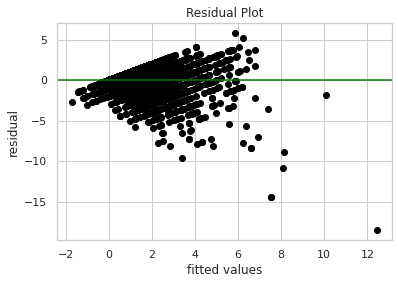

In [515]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

Prediction of how many goals the **away** team is likely to score

In [549]:
# Getting variables

X = merged.iloc[:, [0, 1, 2, 5, 6, 13]]
y = merged.away_score

print(X.head())
print('***************************')
print('')
print(y.head())


   home_team  home_score    away_team  home_rank  away_rank        tourna
0     Sweden           1  Switzerland          4          3      Friendly
1     Sweden           1       France          4         12  Not Friendly
2  Argentina           2         Peru          5         70  Not Friendly
3  Argentina           2         Peru          5         70  Not Friendly
4  Argentina           2         Peru          5         70  Not Friendly
***************************
0    2
1    1
2    1
3    1
4    1
Name: away_score, dtype: int64


In [550]:
# Converting categorical variables into dummy indicators
X = pd.get_dummies(X, drop_first=True)

In [523]:
# Splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#Standardising X_train and X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the polynomial features to X_train and X_test
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.1122642129676559


RMSE value is high. The model used does not accurately predict the data.

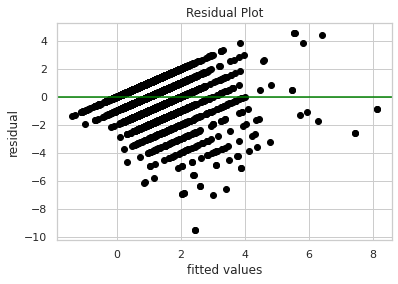

In [524]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

Logistic Regression

In [534]:
# Splitting dataset
#
X = merged.iloc[:, [3, 5, 6, 13]]
y = merged['status']

# converting categorical variables into dummy indicators
X = pd.get_dummies(X, drop_first=True)

# Creating train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [535]:
# Fitting our model
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Prediction
y_pred = LogReg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [536]:
# Evaluating the model
#
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 373,  418, 1219],
       [ 231, 1852,  369],
       [ 293,  247, 3530]])

In [537]:
# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})

The accuracy of the model is {0.6745194561650257}
The f1 score of the model is {0.5901457059481671}


The model yields an accuracy of 67% which is very low